# Ejercicio 1 - Mejoras en el Desempeño de Modelos de Clasificación

Este ejercicio se centra en el entrenamiento y evaluación de algunos modelos modelos de clasificación, sobre un conjunto de datos de campañas de marketing de productos bancarios, aplicando algunas estrategias de mejora del rendimiento de los modelos. 

## Contexto: Análisis de éxito en campaña de marketing

Fuente: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

El foco está en la implementación de una red neuronal para clasificación y la comparación de su desempeño con otro modelo de clasificación para predicir el valor de un atributo, desde un *dataset* de información de un resultados de personas contactadas por una campaña de marketing y que compraron la oferta (atributo "OK"), con cerca de 41.200 registros de personas contactadas.

Este conjunto de datos (abierto para este tipo de usos instruccionales), consiste en 20 atributos y 1 clase de etiquetas (totalizando 21 columnas) y corresponde a los datos de una campaña telefónica a diversos clientes en Portugal, ofreciéndoles la compra de un producto bancario. En varios casos, un cliente fue contactado varias veces antes de aceptar el el depósito a plazo ofrecido por la campaña (OK = yes). 

Algunos de los atributos relevantes son (combinando atributos categóricos, con numéricos):
* **Datos personales**: Edad, Ocupación, Estado Civil, Nivel de Educación.
* **Datos financieros**: Su casa tiene crédito hipotecario, default: si el crédito ha caído en quiebra; tiene un crédito de consumo.
* **Datos de contactos de la campaña actual**: Tipo de Comunicación (celular o teléfono fijo); Mes del último contacto; Día de la semana del contacto; duración de la llamada (segundos); Contacto: N° de contactos durante la campaña; DíasAtrás: días transcurridos desde último contacto; Resultado: resultado de la última llamada (falló, no-existe, éxito)
* **Datos socioeconómicos**: EmpTasaVar: tasa de variación de empleabilidad; IPC: índice de precios consumidor mensual; ICC: índice de confianza consumidor mensual; Euribor3m: tasa euribor de 3 meses indicador diario; NumEmpleados: cantidad de gente empleada, en indicador trimestral. 

Esta adaptación en particular, por Rodrigo Sandoval y el equipo de R:Solver (RSolver.com), enfrenta diferentes objetivos de aprendizaje dentro de los cursos de Big Data y Machine Learning.



## Instrucciones Generales
En este caso, se busca entender el comportamiento y desempeño de diferentes modelos de clasificación sobre este conjunto de datos, para predecir la variable de interés: **OK**, que servirá para predecir en casos futuros, según los datos de contactabilidad de un cliente, si el cliente aceptará o no contratar el depósito a plazo.

Todos los alumnos, ya sea en grupo, o individualmente (si no tienen compañeros), deben contestar las preguntas que se indican en las secciones de "Preguntas", más adelante. Se puede recurrir a ejercicios de otras fuentes, así como al material de clases.

El formato del email es:

To: rsandova@ing.puc.cl

Subject: Machine Learning - Ejercicio 1 - (AÑO)(MES)(DÍA)

Integrantes alfabéticamente: nombre y apellido, nombre y apellido, ...

Pregunta 1: ...

Pregunta 2: ...

...

## Paso 1: Instalar las librerías de modelos de clasificación

Esto se ejecuta sólo una vez al comienzo de la sesión de cada persona. No se necesita volver a ejecutar con cada nueva prueba del resto de los scripts.

In [ ]:
install.packages('e1071')
install.packages('caret')
install.packages('rpart')
install.packages('rpart.plot')
install.packages('randomForest')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Paso 2: Carga de los datos

La siguiente celda de código, carga los datos desde la URL de origen y luego muestra un encabezado con las primeras filas del dataset, para demostrar la disponibilidad de los datos.

Esto también puede ser ejecutado una sola vez, o volver a ejecutar cuando se necesite trabajar con los datos originales, nuevamente.

In [ ]:
# Se declara la URL de dónde obtener los datos
theUrlMain <- "http://www.rsolver.com/dcc/docs/bank-additional-full.csv"

# Se declaran los nombres de las columnas
columnas = c("Edad","Ocupación","EstadoCivil","Educación","Default","Hipotecario","Consumo","Contacto","Mes","Día",
             "Duración","NumContactos","DíasAtrás","Previo","ResultadoPrevio", "EmpTasaVar", "IPC", "ICC", "Euribor3m", "NumEmpleados", "OK")

# Se cargan datos principales a una estructura (marketing.data), asignando nombres de atributos a las columnas.
# Nótese que se incluye la conversión de valores "unknown" a "NA" para facilitar la gestión vacíos más adelante.
marketing.data <- read.table(file = theUrlMain, header = TRUE, sep = ";", col.names = columnas, na.strings=c("unknown","NA"))

# Se muestran las primeras líneas del dataset, incluyendo nombres asignados a las columnas.
# Nótese que ya no hay "unknown", sino que sólo "NA", lo que permite a las operaciones is.na() y na.omit() operar fácilmente
head(marketing.data, 20)
dim(marketing.data)


,Edad,Ocupación,EstadoCivil,Educación,Default,Hipotecario,Consumo,Contacto,Mes,Día,⋯,NumContactos,DíasAtrás,Previo,ResultadoPrevio,EmpTasaVar,IPC,ICC,Euribor3m,NumEmpleados,OK
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,NA,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,45,services,married,basic.9y,NA,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
7,59,admin.,married,professional.course,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
8,41,blue-collar,married,NA,NA,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
9,24,technician,single,professional.course,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


[1] 41188    21

## Paso 3: Complemento de Clasificación Inicial

A continuación se implementa un proceso de clasificación inicial, sin alterar el conjunto de ejemplos y teniendo una proporción genérica de hold-out, con 60% de ejemplos para entrenamiento y 40% de ejemplos para evaluación. Se termina ejecutando un Decision Tree, mostrando sus indicadores de desempeño.

Esta ejecución de un modelo inicial sirve de comparación, evaluando cuánto influyen las mejoras al dataset y entrenamiento, que son parte de los ejercicios, en el desempeño de otros modelos más adelante.

[1] 24712    21

[1] 16476    21

Loading required package: lattice

Loading required package: ggplot2

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


[1] "Resultados Árbol de Decisión"


Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  14012   824
       yes   616  1024
                                          
               Accuracy : 0.9126          
                 95% CI : (0.9082, 0.9169)
    No Information Rate : 0.8878          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5385          
                                          
 Mcnemar's Test P-Value : 4.899e-08       
                                          
            Sensitivity : 0.9579          
            Specificity : 0.5541          
         Pos Pred Value : 0.9445          
         Neg Pred Value : 0.6244          
             Prevalence : 0.8878          
         Detection Rate : 0.8504          
   Detection Prevalence : 0.9005          
      Balanced Accuracy : 0.7560          
                                          
       'Positive' Class : no              
                  

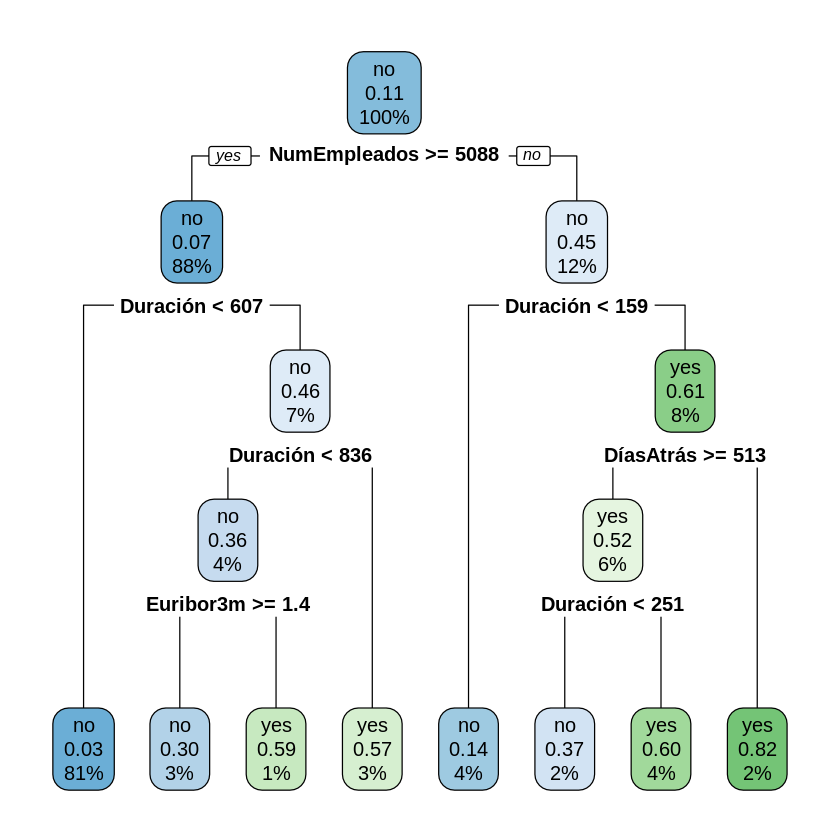

In [ ]:
# Primero se separa el conjunto de ejemplos (marketing.data) en 2,
# uno de entrenamiento y otro de evaluación usando la técnica hold-out,
# que consiste en crear dos conjuntos disjuntos en una proporción dada

ratio = sample(1:nrow(marketing.data), size = 0.60*nrow(marketing.data)) # Proporción: 60% / 40%
training.data = marketing.data[ratio,] 
testing.data = marketing.data[-ratio,] 

# Se muestra la cantidad de ejemplos de cada uno de los dos conjuntos (en la proporción indicada)
dim(training.data)
dim(testing.data)

# Luego se entrena un modelo de clasificación Decision Tree usando el conjunto Train
# y posteriormente se evalúa con predict() para obtener los indicadores de desempeño

library(caret)
library(rpart)
library(rpart.plot)

# Decision Tree
DT_model <- rpart(as.factor(OK) ~ ., data=training.data, method="class", minbucket=10)
DT_predict <- predict(DT_model, testing.data, type = "class")
print("Resultados Árbol de Decisión")
confusionMatrix(DT_predict, as.factor(testing.data$OK)) 
rpart.plot(DT_model)




---


## Ejercicio: Limpieza, balanceo de datos y preparación conjuntos de entrenamiento y evaluación

El siguiente código prepara los datos para el entrenamiento y evaluación, realizando algunas operaciones de limpieza de datos y balanceo entre clases. Hay diferentes elementos de análisis y acciones de mejora del dataset, entre los que se incluye (pero no reduce a):

*   (A) Ya incluido: eliminación de los registros incompletos (que tienen un 'NA' en alguna columna) con na.omit().
*   (B) **Tratamiento y análisis de valores específicos**. Por ej, en el caso de DíasAtrás = 999, que se define como el "valor nulo" (no se ha hecho contacto anteriormente), se podría cambiar por otro valor, o tratar en forma diferente, para evitar la idea de que valores grandes son igualmente reales.
*   (C) **Balance entre clases**, considerando que el dataset original tiene una gran proporción de clientes que NO compraron, a diferencia de los que SI, se incluye una variable balance_ratio, donde 1.0 implica igualar la cantidad de ejemplos de NO y SI, mientras que agrandar ese valor implica agrandar la cantidad de ejemplos NO por sobre los YES. Nótese que este balance es sólo relevante para el conjunto de entrenamiento y no para el de evaluación o test.

**Preguntas**:

1.   ¿Qué acciones de limpieza (B) adicionales a (A) se realizaron?
2.   ¿Qué proporción (1, >1, <1) de ejemplos NO/YES se eligió y por qué? Entonces, ¿de qué dimensiones quedó el dataset de entrenamiento modificado?



In [ ]:
# (A) Se eliminan los registros que tienen algún NA (antes: 'unknown')
marketing.clean <- na.omit(marketing.data)
dim(marketing.clean) # Sólo quedan poco más de 30.000 filas (de las 41.000 originales)


# (B) ¿Qué más se puede y conviene hacer para mejorar la calidad de los datos?


[1] 30488    21

In [ ]:
# Este código arma dos subconjuntos con los datos de cada una de las dos clases.
# Se pueden ver los respectivos tamaños al terminar, evidenciando un desbalance.
clean.data.OK <- marketing.clean[marketing.clean$OK == 'yes',]  
clean.data.NO <- marketing.clean[marketing.clean$OK == 'no',]
dim(clean.data.OK) # Se ve que este es el conjunto más pequeño
dim(clean.data.NO)

[1] 3859   21

[1] 26629    21

In [ ]:
# (C) Se balancean las clases para entrenar: se busca acercar la cantidad de ejemplos positivos, con los negativos.
# Para esto se puede definir la cantidad de ejemplos de la clase más abundante (NO)
# en una proporción (balance_ratio) de la cantidad de registros de la clase menos abundante (YES) 
# balance_ratio = 1.0 implica la misma cantidad para NO y para YES ¿Cuál es la mejor: 1, >1 o <1?

##Cambio el ratio a 0.8, Significa que uno queda con el 80% y otro con el 100%

balance_ratio <- 0.8  

clean.subdata.OK <- clean.data.OK  # No se aplica sample(): se usan todos los ejemplos de la clase OK (que es la que tiene menos ejemplos)
clean.subdata.NO <- clean.data.NO[sample(nrow(clean.data.NO), balance_ratio*dim(clean.data.OK)[1]), ]

# Muestra cantidad de ejemplos contenidos en cada subconjunto
dim(clean.subdata.OK)
dim(clean.subdata.NO)

# Se juntan para el conjunto de referencia, ahora más balanceado
clean.subdata <- rbind(clean.subdata.OK, clean.subdata.NO)

# Ahora se configuran los conjuntos de entrenamiento y testing en una proporción
# (por ej: 0.85 = 85% para training y el resto para evaluación o testing)

## Aplicamos el 80% y 20%
ratio = sample(1:nrow(clean.subdata), size = 0.80*nrow(clean.subdata)) 
training.data = clean.subdata[ratio,]
testing.data = clean.subdata[-ratio,] 

# Se comparan los tamaños de ejemplos para entrenamiento y evaluación.
dim(training.data) 
dim(testing.data)

[1] 3859   21

[1] 3087   21

[1] 5556   21

[1] 1390   21

## Complemento 1: Implementación de un modelo Random Forest para comparar

Esta sección implementa un Random Forest, como modelo de clasificación de referencia, cuyo desempeño será comparado con la Red Neuronal más adelante.

**Pregunta 3**: Si se compara con el desempeño del Árbol de Decisión en el paso 3 anterior ¿Qué diferencia fundamental (ventaja/desventaja) se ve en los indicadores de desempeño y por qué se podría haber logrado esta diferencia?


**Random Forest**

In [ ]:
library(randomForest)
library(caret)

# Random Forest
RF_model <- randomForest(as.factor(OK) ~ ., data=training.data, method="class")
RF_predict <- predict(RF_model, testing.data, type = "class")
confusionMatrix(RF_predict, as.factor(testing.data$OK))

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  476  48
       yes 104 762
                                         
               Accuracy : 0.8906         
                 95% CI : (0.873, 0.9066)
    No Information Rate : 0.5827         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.772          
                                         
 Mcnemar's Test P-Value : 8.154e-06      
                                         
            Sensitivity : 0.8207         
            Specificity : 0.9407         
         Pos Pred Value : 0.9084         
         Neg Pred Value : 0.8799         
             Prevalence : 0.4173         
         Detection Rate : 0.3424         
   Detection Prevalence : 0.3770         
      Balanced Accuracy : 0.8807         
                                         
       'Positive' Class : no             
                                         


---

## Complemento 2: Ejercicio de comprobación manual


Para verificar que alguno de los modelos realmente predice correctamente, se comprueba con los datos de una persona en particular, pidiendo la predicción al modelo. A continuación hay dos ejemplo, que se puede modificar para ver su resultado, cambiando valores y también, cambiando el modelo a utilizar en la predicción. No se necesita modificar, ni comentar esta parte en la entrega.

In [ ]:
# Ejemplo 1: La predicción debería ser "NO"
sample_x <- marketing.clean[1,]
sample_x[1,1] <- 32       # Edad
sample_x[1,2] <- 'admin.' # Ocupación
sample_x[1,3] <- 'single' # EstadoCivil
sample_x[1,4] <- 'university.degree'  # Educación
sample_x

prediction <- predict(RF_model, sample_x)
prediction



# Ejemplo 2: La predicción debería ser "YES"
sample_x2 <- marketing.clean[1,]
sample_x2[1,1] <- 42
sample_x2[1,11] <- 600   # Duración
sample_x2[1,19] <- 2000  # NumEmpleados 
sample_x2

prediction <- predict(RF_model, sample_x2)
prediction
